
# **MILESTONE 1**

#**1. Bussines Background**

**1. Data Overview**

## **1.1 Bussines Background**

**RevoBank** is a European bank that provides credit cards to its customers. My current assignment is within the Card Partnership division, which aims to enhance the usage of RevoBank credit cards through partnerships with various merchants.

The objective of this analysis is to comprehend the performance of the promotional program, create segments of RevoBank credit card users, and identify business opportunities to customize the rewards program for each customer segment.

## **1.2 Dataset**
RevoBank :  
> https://drive.google.com/file/d/13peZVbEuHkaFk3_utptmo3aVFJ9v545p/view?usp=sharing

## **1.3 Data Disctionary**

> https://docs.google.com/spreadsheets/d/1So7I6cbRVavONdtoZ1E3vITaq05Eswzp/edit?usp=sharing&ouid=106388925887876498460&rtpof=true&sd=true





# **2. Data Preparation**

## **2.1 Import Library**

In [63]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## **2.2 Import Data**

In [64]:
sheet_url = 'https://drive.google.com/file/d/13peZVbEuHkaFk3_utptmo3aVFJ9v545p/view'
sheet_url_replace = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]

print(sheet_url_replace)

df = pd.read_csv(sheet_url_replace)

https://drive.google.com/uc?id=13peZVbEuHkaFk3_utptmo3aVFJ9v545p


In [65]:
df.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [66]:
df.tail()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5.0,25.0,4.0,...,E,Y,0.0,24294.0,0.0,30.0,112.0,0.0,0.0,1982-05-14
112633,101059869,5311-DEPARTMENT STORES,EL CORTE INGLES,36.0,45.0,32.5,20.0,4.0,19.0,3.0,...,E,Y,0.0,32009.0,0.0,22.0,100.0,1.0,0.0,1983-12-17


# **3. Data Cleaning**

In [67]:
# Make a copy of the original data for data cleaning
df_clean = df.copy()

## **3.1 Check Data Type**

In [68]:
df_clean.shape

(112634, 24)

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

Change the BIRTH_DATE data type to **datetime**

In [70]:
# Conver datatype 'BIRTH_DATE' column to timeseries
df_clean['BIRTH_DATE'] = pd.to_datetime(df_clean['BIRTH_DATE'], format='%Y-%m-%d')

print(df_clean['BIRTH_DATE'].dtype)

datetime64[ns]


## **3.2 Check Missing Value**

In [71]:
df_clean.isnull().sum()

ACCOUNT_ID               0
MCC                      0
MERCHANT_NAME            0
AVG_TXN_AMT_L6M          0
AVG_TXN_AMT_LTM          0
AVG_PROMO_TXN_AMT_L6M    0
AVG_PROMO_TXN_AMT_LTM    0
TXN_CNT_L6M              0
TXN_CNT_LTM              0
PROMO_TXN_CNT_L6M        0
PROMO_TXN_CNT_LTM        0
LAST_TXN_DAY             0
CNT_PROMO_L6M            0
CNT_PROMO_L12M           0
CUST_VALUE_GROUP         0
MAPP_ACTIVE_GROUP        0
HOMEOWNER_STATUS         0
HOME_VALUE               0
PROXY_INCOME             0
PCT_INCOME_RETIREMENT    0
MOB                      0
FLAG_FEMALE              0
PROMO_CHANNEL            0
BIRTH_DATE               0
dtype: int64

There are **no missing values** in each column

Therefore we need to find out any data that **AVG_PROMO_TXN_AMT_L6M == -1** based on DATA DICTIONARY

In [72]:
filtered_rows = df_clean[df_clean['AVG_PROMO_TXN_AMT_L6M'] == -1]
print(filtered_rows)

        ACCOUNT_ID                MCC  MERCHANT_NAME  AVG_TXN_AMT_L6M  \
32       100000133  5262-MARKETPLACES  REVOSH MKTPLC            233.3   
82       100000302  5262-MARKETPLACES  REVOSH MKTPLC            250.0   
104      100000357  5262-MARKETPLACES  REVOSH MKTPLC            140.0   
117      100000387  5262-MARKETPLACES  REVOSH MKTPLC            250.0   
166      100000591  5262-MARKETPLACES  REVOSH MKTPLC            110.0   
...            ...                ...            ...              ...   
112339   101057451  5262-MARKETPLACES       REVOSHOP            160.0   
112368   101057690  5262-MARKETPLACES       REVOSHOP            225.0   
112399   101057929  5262-MARKETPLACES       REVOSHOP            150.0   
112479   101058836  5262-MARKETPLACES       REVOSHOP            100.0   
112492   101058933  5262-MARKETPLACES       REVOSHOP            220.0   

        AVG_TXN_AMT_LTM  AVG_PROMO_TXN_AMT_L6M  AVG_PROMO_TXN_AMT_LTM  \
32                180.0                   -1.0    

In [73]:
# Remove missing values in AVG_PROMO_TXN_AMT_L6M column have missing data indicated by -1 value
df_clean[df_clean['AVG_PROMO_TXN_AMT_L6M'] == -1]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
32,100000133,5262-MARKETPLACES,REVOSH MKTPLC,233.3,180.0,-1.0,100.0,4.0,9.0,1.0,...,A,X,0.0,347926.0,0.0,1.0,66.0,1.0,1.0,1985-12-21
82,100000302,5262-MARKETPLACES,REVOSH MKTPLC,250.0,185.6,-1.0,220.0,2.0,44.0,1.0,...,A,X,0.0,0.0,0.0,1.0,124.0,1.0,1.0,1982-02-24
104,100000357,5262-MARKETPLACES,REVOSH MKTPLC,140.0,102.5,-1.0,140.0,2.0,25.0,1.0,...,A,X,0.0,85733.0,67273.0,1.0,106.0,0.0,0.0,1983-08-22
117,100000387,5262-MARKETPLACES,REVOSH MKTPLC,250.0,240.7,-1.0,200.0,2.0,47.0,1.0,...,A,X,0.0,0.0,0.0,1.0,212.0,1.0,0.0,1983-11-21
166,100000591,5262-MARKETPLACES,REVOSH MKTPLC,110.0,79.5,-1.0,110.0,2.0,22.0,1.0,...,A,X,1.0,133906.0,47075.0,1.0,130.0,0.0,0.0,1977-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112339,101057451,5262-MARKETPLACES,REVOSHOP,160.0,112.1,-1.0,160.0,2.0,15.0,1.0,...,E,X,0.0,15028.0,46247.0,46.0,124.0,1.0,0.0,1983-12-24
112368,101057690,5262-MARKETPLACES,REVOSHOP,225.0,325.0,-1.0,250.0,3.0,11.0,1.0,...,E,X,1.0,27511.0,30431.0,44.0,102.0,0.0,0.0,1981-04-23
112399,101057929,5262-MARKETPLACES,REVOSHOP,150.0,86.7,-1.0,100.0,3.0,13.0,1.0,...,E,X,1.0,33695.0,41835.0,36.0,106.0,1.0,0.0,1977-10-26
112479,101058836,5262-MARKETPLACES,REVOSHOP,100.0,73.3,-1.0,100.0,4.0,25.0,1.0,...,E,X,0.0,28398.0,0.0,26.0,122.0,1.0,1.0,1981-08-25


**There are 3516 rows** that have the value AVG_PROMO_TXN_AMT_L6M == -1. This will be a problem in the analysis process so it is necessary to delete the data.

In [74]:
df_clean

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5.0,25.0,4.0,...,E,Y,0.0,24294.0,0.0,30.0,112.0,0.0,0.0,1982-05-14


## **3.3 Check Duplicate Value**

In [75]:
print('Number of duplicated data is : ', df_clean.duplicated().sum())

Number of duplicated data is :  0


In [76]:
for column in df_clean.columns:
    print(column)
    print(df_clean[column].unique())

ACCOUNT_ID
[100000004 100000008 100000012 ... 101059860 101059866 101059869]
MCC
['5262-MARKETPLACES' '5311-DEPARTMENT STORES']
MERCHANT_NAME
['REVOSH MKTPLC' 'TOKTOKLIVE' 'REVOSHOP' 'EL CORTE INGLES']
AVG_TXN_AMT_L6M
[216.  143.3 263.3 ...  85.8  80.3 397.5]
AVG_TXN_AMT_LTM
[201.  114.1 242.7 ... 317.5 944.3  30.2]
AVG_PROMO_TXN_AMT_L6M
[ 2.000e+02  1.400e+02  4.000e+02  2.429e+02  9.750e+01  1.220e+02
  2.263e+02  2.050e+02  1.100e+02  2.500e+02  9.000e+01  1.517e+02
  8.750e+01  2.233e+02  7.500e+01  3.670e+01  1.200e+02  1.000e+02
  1.700e+02  4.100e+02  3.000e+01  8.500e+01  5.000e+01  6.670e+01
  8.330e+01  4.000e+01  1.500e+02  1.240e+02  2.675e+02  1.950e+02
 -1.000e+00  2.033e+02  2.100e+02  1.283e+02  3.300e+02  6.170e+01
  3.000e+02  9.670e+01  1.375e+02  1.250e+02  1.300e+02  7.000e+01
  1.080e+02  1.750e+02  1.040e+02  1.900e+02  1.800e+02  2.333e+02
  2.750e+02  1.086e+02  1.150e+02  1.600e+02  3.250e+02  1.020e+02
  1.000e+03  1.133e+02  7.670e+01  7.330e+01  1.167e+02  

There is **no duplicate data**, but we have to check it by column

In [77]:
for col in df_clean.columns:
  print(col)
  print(df_clean[col].value_counts())
  print('\n')

ACCOUNT_ID
ACCOUNT_ID
100070125    2
100502294    2
100771163    2
100376790    2
100950065    2
            ..
100356812    1
100356810    1
100356795    1
100356780    1
101059869    1
Name: count, Length: 112433, dtype: int64


MCC
MCC
5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: count, dtype: int64


MERCHANT_NAME
MERCHANT_NAME
REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: count, dtype: int64


AVG_TXN_AMT_L6M
AVG_TXN_AMT_L6M
100.0    12373
150.0     4245
50.0      3794
110.0     3533
120.0     2970
         ...  
208.8        1
540.0        1
302.5        1
26.3         1
397.5        1
Name: count, Length: 1033, dtype: int64


AVG_TXN_AMT_LTM
AVG_TXN_AMT_LTM
100.0    855
50.0     699
90.0     638
80.0     636
70.0     578
        ... 
575.0      1
362.5      1
215.6      1
296.5      1
30.2       1
Name: count, Length: 2353, dtype: int64


AVG_PROMO_TXN_AMT_L6M
AVG_PROMO_TXN_AMT_L6M
100.0    17

There are duplicate values in column **"ACCOUNT_ID"**

In [78]:
# Check duplicate values in column "ACCOUNT_ID"
df_clean[df_clean['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
169,100000600,5262-MARKETPLACES,TOKTOKLIVE,250.0,131.7,250.0,100.0,2.0,25.0,2.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
1836,100017966,5262-MARKETPLACES,REVOSH MKTPLC,150.0,78.8,150.0,100.0,3.0,17.0,2.0,...,B,X,1.0,163791.0,87214.0,23.0,92.0,0.0,0.0,1985-02-11
1890,100018465,5262-MARKETPLACES,TOKTOKLIVE,88.0,78.9,86.7,100.0,4.0,17.0,2.0,...,B,X,1.0,64423.0,47589.0,20.0,102.0,1.0,1.0,1972-10-15
3080,100033332,5262-MARKETPLACES,REVOSH MKTPLC,122.5,245.6,50.0,160.0,4.0,21.0,1.0,...,B,X,1.0,227497.0,0.0,24.0,127.0,0.0,1.0,1983-04-21
3653,100038831,5262-MARKETPLACES,TOKTOKLIVE,150.0,206.4,150.0,200.0,2.0,11.0,2.0,...,A,X,1.0,102884.0,72887.0,25.0,105.0,0.0,0.0,1986-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110711,101044177,5262-MARKETPLACES,TOKTOKLIVE,100.0,85.2,100.0,100.0,4.0,22.0,3.0,...,D,X,1.0,68891.0,57264.0,39.0,127.0,0.0,0.0,1987-02-26
110833,101045135,5262-MARKETPLACES,REVOSHOP,100.0,104.3,100.0,100.0,2.0,13.0,2.0,...,D,X,0.0,71314.0,0.0,31.0,51.0,0.0,1.0,1990-02-19
110857,101045627,5262-MARKETPLACES,REVOSHOP,57.3,56.2,50.0,50.0,11.0,34.0,4.0,...,E,X,1.0,53316.0,39696.0,38.0,91.0,0.0,0.0,1987-07-23
110878,101045690,5262-MARKETPLACES,TOKTOKLIVE,106.7,98.8,100.0,130.0,2.0,23.0,1.0,...,E,X,0.0,26290.0,36366.0,36.0,126.0,1.0,0.0,1980-08-18


There are 201 rows in duplicated

In [79]:
# Delete duplicate values in column "ACCOUNT_ID"
df_clean = df_clean.drop_duplicates(subset=['ACCOUNT_ID'])
print(df_clean)

        ACCOUNT_ID                     MCC    MERCHANT_NAME  AVG_TXN_AMT_L6M  \
0        100000004       5262-MARKETPLACES    REVOSH MKTPLC            216.0   
1        100000008       5262-MARKETPLACES    REVOSH MKTPLC            143.3   
2        100000012       5262-MARKETPLACES    REVOSH MKTPLC            263.3   
3        100000014       5262-MARKETPLACES    REVOSH MKTPLC            235.6   
4        100000015       5262-MARKETPLACES    REVOSH MKTPLC             98.0   
...            ...                     ...              ...              ...   
112629   101059843       5262-MARKETPLACES         REVOSHOP            120.0   
112630   101059857       5262-MARKETPLACES         REVOSHOP             52.9   
112631   101059860       5262-MARKETPLACES         REVOSHOP            195.0   
112632   101059866       5262-MARKETPLACES         REVOSHOP             84.0   
112633   101059869  5311-DEPARTMENT STORES  EL CORTE INGLES             36.0   

        AVG_TXN_AMT_LTM  AVG_PROMO_TXN_

In [80]:
# Check if this conducted correctly
df_clean[df_clean.duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


## **3.4 Check Typo Value**

In [81]:
df_clean['MERCHANT_NAME'].value_counts()

MERCHANT_NAME
REVOSHOP           91082
REVOSH MKTPLC      19947
TOKTOKLIVE          1403
EL CORTE INGLES        1
Name: count, dtype: int64



Rename REVOSH MKTPLC to REVOSHOP because this is the same merchant


In [82]:
df_clean['MERCHANT_NAME']=df_clean['MERCHANT_NAME'].replace('REVOSH MKTPLC','REVOSHOP')

<ipython-input-82-4832bf608408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MERCHANT_NAME']=df_clean['MERCHANT_NAME'].replace('REVOSH MKTPLC','REVOSHOP')


In [83]:
df_clean['MERCHANT_NAME'].value_counts()

MERCHANT_NAME
REVOSHOP           111029
TOKTOKLIVE           1403
EL CORTE INGLES         1
Name: count, dtype: int64

## **3.5 Remove Irrelevant Values**

In [84]:
# Remove TOKTOKLIVE and EL CORTE INGLES from 'MERCHANT_NAME' coloumn
df_clean = df_clean[~(df_clean['MERCHANT_NAME'].isin(['TOKTOKLIVE', 'EL CORTE INGLES']))]
df_clean

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


Remove TOKTOKLIVE & EL CORTE INGLES because they only analyze data in REVOSHOP

**3.7 Add Columns**

In [85]:
# Add column as 'CUSTOMER_AGE' based on BIRTH_DATE
df_clean['CUSTOMER_AGE'] = round((datetime(year=2023, month=1, day=31) - df_clean['BIRTH_DATE'])/np.timedelta64(1,'Y'))
df_clean['CUSTOMER_AGE'] = df_clean['CUSTOMER_AGE'].astype(int)
df_clean.head()

<ipython-input-85-8c86a60ae982>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CUSTOMER_AGE'] = round((datetime(year=2023, month=1, day=31) - df_clean['BIRTH_DATE'])/np.timedelta64(1,'Y'))
<ipython-input-85-8c86a60ae982>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CUSTOMER_AGE'] = df_clean['CUSTOMER_AGE'].astype(int)


,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,CUSTOMER_AGE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17,47
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27,31
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22,53
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26,39
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21,33


In [86]:
df_clean['MCC'].value_counts()

MCC
5262-MARKETPLACES    111029
Name: count, dtype: int64

*   Remove DEPARTMENT STORES because they only analyze data in MARKETPLACES

In [87]:
# Remove DEPARTMENT STORES from 'MCC' coloumn
df_clean[(df_clean['MCC'] == '5311-DEPARTMENT STORES')]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,CUSTOMER_AGE


In [88]:
df_clean.shape

(111029, 25)

# **4. Create Column Promo-Sensitive**



A customer is considered **promo sensitive** if more than 50% of his total sales on RevoShop are attributed to the promo

In [89]:
df2 = df_clean.copy()

In [90]:
# Lifetime (LTM)promo-sensitive

# Calculate total sales with and without promotions and compare the two
df2 ['TOTAL_SALES_LTM']= df2['AVG_TXN_AMT_LTM'] * df2['TXN_CNT_LTM']
df2 ['TOTAL_SALES_PROMO_LTM'] = df2 ['AVG_PROMO_TXN_AMT_LTM'] * df2 ['PROMO_TXN_CNT_LTM']
df2 ['RATIO_SALES_PROMO_LTM'] = df2 ['TOTAL_SALES_PROMO_LTM'] / df2['TOTAL_SALES_LTM']

# Create a promo-sensitive value to lifetime promos
df2.loc[(df2['RATIO_SALES_PROMO_LTM'] > 0.5), 'PROMO_SNSTV_LTM'] = 1
df2.loc[(df2['RATIO_SALES_PROMO_LTM'] <= 0.5), 'PROMO_SNSTV_LTM'] = 0
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111029 entries, 0 to 112632
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             111029 non-null  int64         
 1   MCC                    111029 non-null  object        
 2   MERCHANT_NAME          111029 non-null  object        
 3   AVG_TXN_AMT_L6M        111029 non-null  float64       
 4   AVG_TXN_AMT_LTM        111029 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  111029 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  111029 non-null  float64       
 7   TXN_CNT_L6M            111029 non-null  float64       
 8   TXN_CNT_LTM            111029 non-null  float64       
 9   PROMO_TXN_CNT_L6M      111029 non-null  float64       
 10  PROMO_TXN_CNT_LTM      111029 non-null  float64       
 11  LAST_TXN_DAY           111029 non-null  float64       
 12  CNT_PROMO_L6M          111029 non-null  float64  

In [91]:
# Average transaction promo over 6 six months (LTM)
average_txn_amt_promo = df2['AVG_PROMO_TXN_AMT_LTM'].mean()

print("Average Transaction Promo (AVG_PROMO_TXN_AMT_LTM) :", average_txn_amt_promo)

Average Transaction Promo (AVG_PROMO_TXN_AMT_LTM) : 120.35936467049147


In [92]:
# Average transaction in over 6 six months (LTM)
average_txn_amt = df2['AVG_TXN_AMT_LTM'].mean()

print("Average Transaction (AVG_TXN_AMT_LTM) :", average_txn_amt)

Average Transaction (AVG_TXN_AMT_LTM) : 107.34286807951074


In [93]:
# Last Six Month (L6M) promo-sensitive

# Calculate total sales with and without promotions and compare
df2 ['TOTAL_SALES_L6M']= df2['AVG_TXN_AMT_L6M'] * df2['TXN_CNT_L6M']
df2 ['TOTAL_SALES_PROMO_L6M'] = df2 ['AVG_PROMO_TXN_AMT_L6M'] * df2 ['PROMO_TXN_CNT_L6M']
df2 ['RATIO_SALES_PROMO_L6M'] = df2 ['TOTAL_SALES_PROMO_L6M'] / df2['TOTAL_SALES_L6M']

# Create a promo-sensitive value on L6M basis
df2.loc[(df2['RATIO_SALES_PROMO_L6M'] > 0.5), 'PROMO_SNSTV_L6M'] = 1
df2.loc[(df2['RATIO_SALES_PROMO_L6M'] <= 0.5), 'PROMO_SNSTV_L6M'] = 0
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111029 entries, 0 to 112632
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             111029 non-null  int64         
 1   MCC                    111029 non-null  object        
 2   MERCHANT_NAME          111029 non-null  object        
 3   AVG_TXN_AMT_L6M        111029 non-null  float64       
 4   AVG_TXN_AMT_LTM        111029 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  111029 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  111029 non-null  float64       
 7   TXN_CNT_L6M            111029 non-null  float64       
 8   TXN_CNT_LTM            111029 non-null  float64       
 9   PROMO_TXN_CNT_L6M      111029 non-null  float64       
 10  PROMO_TXN_CNT_LTM      111029 non-null  float64       
 11  LAST_TXN_DAY           111029 non-null  float64       
 12  CNT_PROMO_L6M          111029 non-null  float64  

In [94]:
# Average transaction promo in 6 six months (L6M)
average_txn_amt_promo = df2['AVG_PROMO_TXN_AMT_L6M'].mean()

print("Average Transaction Promo (AVG_PROMO_TXN_AMT_L6M) :", average_txn_amt_promo)

Average Transaction Promo (AVG_PROMO_TXN_AMT_L6M) : 121.73789190211566


In [95]:
# Average transaction in 6 six months (L6M)
average_txn_amt = df2['AVG_TXN_AMT_L6M'].mean()

print("Average Transaction (AVG_TXN_AMT_L6M) :", average_txn_amt)

Average Transaction (AVG_TXN_AMT_L6M) : 127.48231092777561


## 4.1 Check Promo-Sensitive

In [96]:
print(df2['PROMO_SNSTV_LTM'].value_counts())
print('\n')
print(df2['PROMO_SNSTV_L6M'].value_counts())

PROMO_SNSTV_LTM
1.0    75501
0.0    35528
Name: count, dtype: int64


PROMO_SNSTV_L6M
1.0    72021
0.0    39008
Name: count, dtype: int64


# **5. Descriptive Statistics**
* How much total sales have been generated in RevoShop over the past 6 months?
* How many sales were made in response to the promoin the last 6 months?
* What is total cost of promotion over the past 6 months?
* What is the total revenue generated by the promo in the past 6 months? (Total revenue can be calculated by multiplying the total sales by 2.4 %)
* How many customers are considered promo-sensitive?

## 5.1 Question 1

In [97]:
# Total sales have been generated in RevoShop over the past 6 months
df2 ['TOTAL_SALES_L6M'].sum()

58026729.699999996

## 5.1 Question 2

In [98]:
# Sales were made in response to the promotion the last 6 months
df2 ['TOTAL_SALES_PROMO_L6M'].sum()
print("Total Sales were made in response to the promotion the last 6 months is", df2 ['TOTAL_SALES_PROMO_L6M'].sum())

Total Sales were made in response to the promotion the last 6 months is 35173321.3


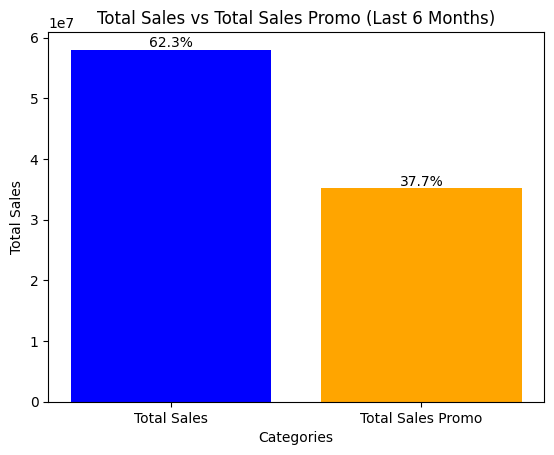

In [99]:
# Create a bar chart in the last6 six months (L6M)
total_sales_l6m = df2['TOTAL_SALES_L6M'].sum()
total_sales_promo_l6m = df2['TOTAL_SALES_PROMO_L6M'].sum()

categories = ['Total Sales', 'Total Sales Promo']
values = [total_sales_l6m, total_sales_promo_l6m]

# Added percentage annotation above each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{(v / sum(values)):.1%}', ha='center', va='bottom')

plt.bar(categories, values, color=['blue', 'orange'])
plt.xlabel('Categories')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Total Sales Promo (Last 6 Months)')
plt.show()


## 5.1 Question 3

In [100]:
# Total cost of promotion over the past 6 months
# Total cost can be calculated as the number of promo transactions multiplied by 1.5
TOTAL_COST = df2 ['PROMO_TXN_CNT_L6M'].sum () * 1.5
print("Total cost of promotion over the past 6 months",TOTAL_COST)

Total cost of promotion over the past 6 months 460942.5


## 5.1 Question 4

In [101]:
# Total revenue generated by the promotin the past 6 months
# Total revenue can be calculated by multiplying the total sales by 2.4 %
TOTAL_REVENUE =  df2 ['TOTAL_SALES_PROMO_L6M'].sum() * 0.024
print("Total Revenue generated by the promo in the past 6 months is",TOTAL_REVENUE)

Total Revenue generated by the promo in the past 6 months is 844159.7111999999


## 5.1 Question 5

In [102]:
#Customers are considered promo-sensitive
print(df2['PROMO_SNSTV_LTM'].value_counts(True))
print('\n')
print(df2['PROMO_SNSTV_L6M'].value_counts(True))

PROMO_SNSTV_LTM
1.0    0.680012
0.0    0.319988
Name: proportion, dtype: float64


PROMO_SNSTV_L6M
1.0    0.648668
0.0    0.351332
Name: proportion, dtype: float64


In [103]:
df_promo = df2.copy()

# Rename values prmo non promo in lifetime (LTM) and if '1' is Yes, '0' is No
promo = {1: 'Yes', 0: 'No'}
df_promo['PROMO_SNSTV_LTM'] = df_promo['PROMO_SNSTV_LTM'].replace(promo)

print(df_promo)

        ACCOUNT_ID                MCC MERCHANT_NAME  AVG_TXN_AMT_L6M  \
0        100000004  5262-MARKETPLACES      REVOSHOP            216.0   
1        100000008  5262-MARKETPLACES      REVOSHOP            143.3   
2        100000012  5262-MARKETPLACES      REVOSHOP            263.3   
3        100000014  5262-MARKETPLACES      REVOSHOP            235.6   
4        100000015  5262-MARKETPLACES      REVOSHOP             98.0   
...            ...                ...           ...              ...   
112628   101059832  5262-MARKETPLACES      REVOSHOP            100.0   
112629   101059843  5262-MARKETPLACES      REVOSHOP            120.0   
112630   101059857  5262-MARKETPLACES      REVOSHOP             52.9   
112631   101059860  5262-MARKETPLACES      REVOSHOP            195.0   
112632   101059866  5262-MARKETPLACES      REVOSHOP             84.0   

        AVG_TXN_AMT_LTM  AVG_PROMO_TXN_AMT_L6M  AVG_PROMO_TXN_AMT_LTM  \
0                 201.0                  200.0                

<Axes: xlabel='PROMO_SNSTV_LTM'>

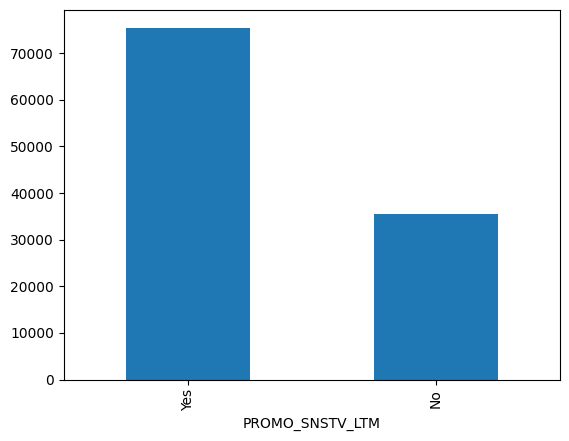

In [104]:
df_promo['PROMO_SNSTV_LTM'].value_counts().plot(kind='bar')

In [105]:
# Rename values prmo non promo in last 6 months (L6M) and if '1' is Yes, '0' is No
promo = {1: 'Yes', 0: 'No'}
df_promo['PROMO_SNSTV_L6M'] = df_promo['PROMO_SNSTV_L6M'].replace(promo)

print(df_promo)

        ACCOUNT_ID                MCC MERCHANT_NAME  AVG_TXN_AMT_L6M  \
0        100000004  5262-MARKETPLACES      REVOSHOP            216.0   
1        100000008  5262-MARKETPLACES      REVOSHOP            143.3   
2        100000012  5262-MARKETPLACES      REVOSHOP            263.3   
3        100000014  5262-MARKETPLACES      REVOSHOP            235.6   
4        100000015  5262-MARKETPLACES      REVOSHOP             98.0   
...            ...                ...           ...              ...   
112628   101059832  5262-MARKETPLACES      REVOSHOP            100.0   
112629   101059843  5262-MARKETPLACES      REVOSHOP            120.0   
112630   101059857  5262-MARKETPLACES      REVOSHOP             52.9   
112631   101059860  5262-MARKETPLACES      REVOSHOP            195.0   
112632   101059866  5262-MARKETPLACES      REVOSHOP             84.0   

        AVG_TXN_AMT_LTM  AVG_PROMO_TXN_AMT_L6M  AVG_PROMO_TXN_AMT_LTM  \
0                 201.0                  200.0                

<Axes: xlabel='PROMO_SNSTV_L6M'>

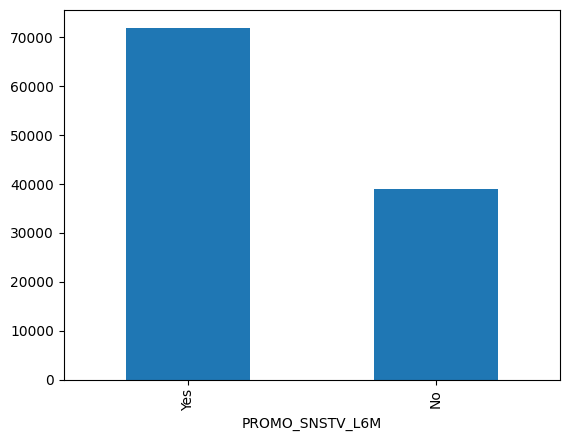

In [106]:
df_promo['PROMO_SNSTV_L6M'].value_counts().plot(kind='bar')

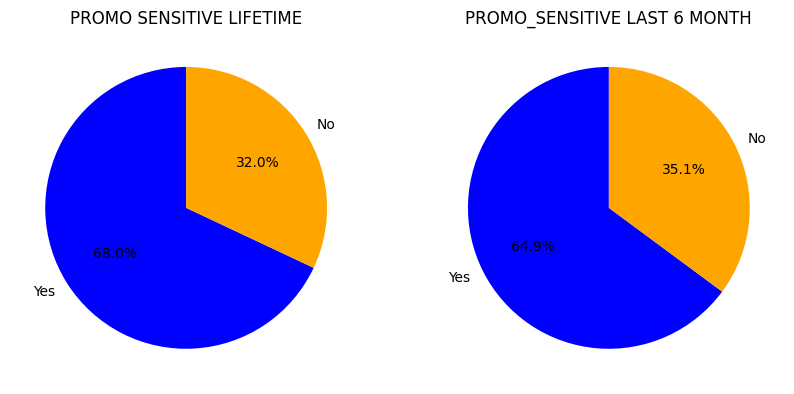

In [107]:
# Calculate value counts for promo-sentive
promo_snstv_ltm_counts = df_promo['PROMO_SNSTV_LTM'].value_counts(normalize=True)
promo_snstv_l6m_counts = df_promo['PROMO_SNSTV_L6M'].value_counts(normalize=True)

# Create subplots for two pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for PROMO_SNSTV_LTM
axs[0].pie(promo_snstv_ltm_counts, labels=promo_snstv_ltm_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axs[0].set_title('PROMO SENSITIVE LIFETIME')

# Pie chart for PROMO_SNSTV_L6M
axs[1].pie(promo_snstv_l6m_counts, labels=promo_snstv_l6m_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axs[1].set_title('PROMO_SENSITIVE LAST 6 MONTH')

plt.show()


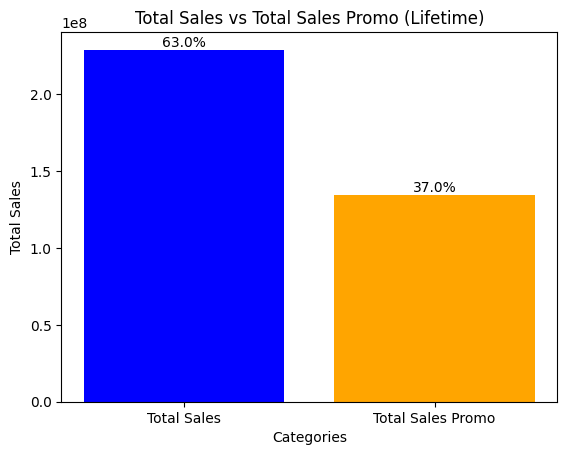

In [108]:
# Create a bar chart over 6 six months (LTM)
total_sales_ltm = df2['TOTAL_SALES_LTM'].sum()
total_sales_promo_ltm = df2['TOTAL_SALES_PROMO_LTM'].sum()

categories = ['Total Sales', 'Total Sales Promo']
values = [total_sales_ltm, total_sales_promo_ltm]

# Added percentage annotation above each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{(v / sum(values)):.1%}', ha='center', va='bottom')

plt.bar(categories, values, color=['blue', 'orange'])
plt.xlabel('Categories')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Total Sales Promo (Lifetime)')
plt.show()


In [109]:
# Rename values prmo non promo chanel and if '1' is via e-mail, '0' is via SMS
promo_chanel = {1: 'Email', 0: 'SMS'}
df_promo['PROMO_CHANNEL'] = df_promo['PROMO_CHANNEL'].replace(promo_chanel)

print(df_promo)

        ACCOUNT_ID                MCC MERCHANT_NAME  AVG_TXN_AMT_L6M  \
0        100000004  5262-MARKETPLACES      REVOSHOP            216.0   
1        100000008  5262-MARKETPLACES      REVOSHOP            143.3   
2        100000012  5262-MARKETPLACES      REVOSHOP            263.3   
3        100000014  5262-MARKETPLACES      REVOSHOP            235.6   
4        100000015  5262-MARKETPLACES      REVOSHOP             98.0   
...            ...                ...           ...              ...   
112628   101059832  5262-MARKETPLACES      REVOSHOP            100.0   
112629   101059843  5262-MARKETPLACES      REVOSHOP            120.0   
112630   101059857  5262-MARKETPLACES      REVOSHOP             52.9   
112631   101059860  5262-MARKETPLACES      REVOSHOP            195.0   
112632   101059866  5262-MARKETPLACES      REVOSHOP             84.0   

        AVG_TXN_AMT_LTM  AVG_PROMO_TXN_AMT_L6M  AVG_PROMO_TXN_AMT_LTM  \
0                 201.0                  200.0                

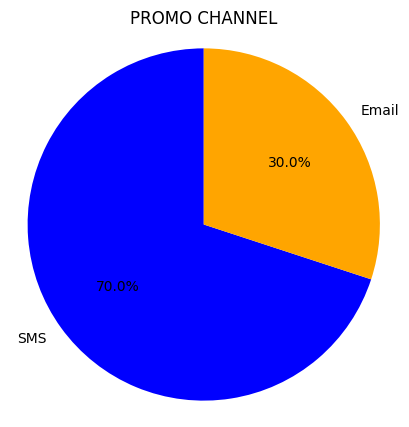

In [110]:
# Calculate value counts for PROMO_CHANNEL
promo_channel_counts = df_promo['PROMO_CHANNEL'].value_counts(normalize=True)

# Create a pie chart for PROMO_CHANNEL
plt.figure(figsize=(5, 5))
plt.pie(promo_channel_counts, labels=promo_channel_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('PROMO CHANNEL')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


<Axes: xlabel='PROMO_CHANNEL'>

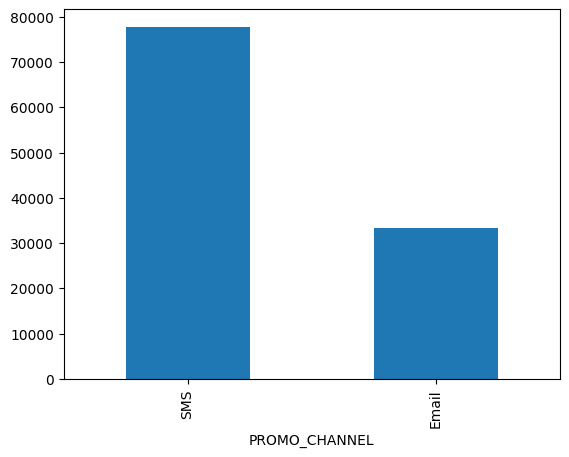

In [111]:
df_promo['PROMO_CHANNEL'].value_counts().plot(kind='bar')

# **6. Trends**

## 6.1 Question 1
Is there any difference in transaction behavior and promo sensitivity between active and inactive customers in the past 6 months? (Hint: Compare the number of customer, promo-sensitive customers, average transaction amount, and average transaction count per customer for each customer group)



*Notes:*

The question doesn't specify "active/inactive customers", let's use MAPP_ACTIVE_GROUP as a proxy for activity.
Remember the definition of MAPP_ACTIVE_GROUP: Status of account activity in the bank's mobile app (e.g. opening the app, making transactions via the app, etc) based on DATA DICTIONARY so we do our own exploration :
n  
* X : High Activity
* Y : Average Activity
* Z : Low Activity

In [112]:
df3 = df2.copy()

In [113]:
# Rename values 'MAPP_ACTIVE_GROUP'
df3['MAPP_ACTIVE_GROUP'] = df3['MAPP_ACTIVE_GROUP'].replace({'X': 'Active', 'Y': 'Average', 'Z': 'Inactive'})
df3['MAPP_ACTIVE_GROUP'].value_counts()

MAPP_ACTIVE_GROUP
Active      103251
Average       7294
Inactive       484
Name: count, dtype: int64

In [114]:
# Rename values 'MAPP_ACTIVE_GROUP'
df3['MAPP_ACTIVE_GROUP'] = df3['MAPP_ACTIVE_GROUP'].replace({'X': 'Active', 'Y': 'Average', 'Z': 'Inactive'})
df3['MAPP_ACTIVE_GROUP'].value_counts()

MAPP_ACTIVE_GROUP
Active      103251
Average       7294
Inactive       484
Name: count, dtype: int64

,ACCOUNT_ID
MAPP_ACTIVE_GROUP,
Active,103251
Average,7294
Inactive,484


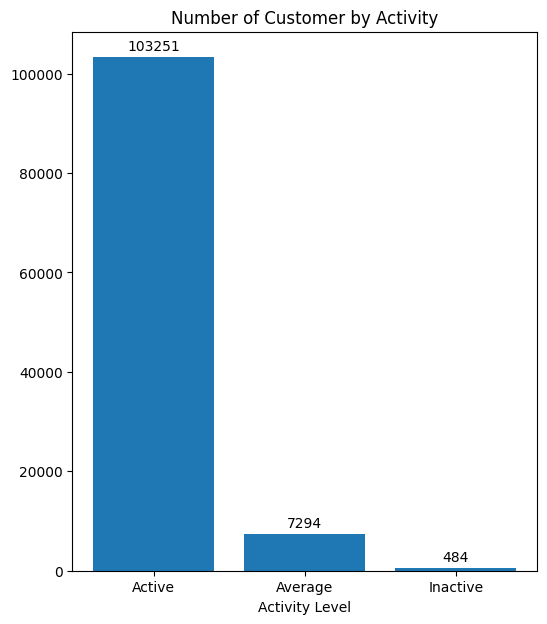

In [115]:
# Number of Customer by Activity Level
df_account = pd.DataFrame(df3.groupby(['MAPP_ACTIVE_GROUP']).count()['ACCOUNT_ID'])
df_account
display(pd.DataFrame(df_account))
print('\n')
fig, ax = plt.subplots(figsize=(6,7))
ax1 = ax.bar(df_account.index, df_account['ACCOUNT_ID'])
ax.bar_label(ax1, padding=3)
ax.set_title('Number of Customer by Activity')
ax.set_xlabel('Activity Level')
fig.show()

In [116]:
# Total transaction value in the last 6 months
df3['TXN_AMT_L6M'] = df3['AVG_TXN_AMT_L6M'] * df3['TXN_CNT_L6M']
df3['TXN_AMT_L6M'].head()

0    1080.0
1     429.9
2    1053.2
3    1884.8
4     490.0
Name: TXN_AMT_L6M, dtype: float64

In [117]:
# Difference in transaction behavior and promo sensitivity between active and inactive customers in the past 6 months
df_behavior_l6m = df3.groupby(['MAPP_ACTIVE_GROUP','PROMO_SNSTV_L6M']).agg({
    'TXN_AMT_L6M': 'mean',
    'TXN_CNT_L6M': 'mean'
})
df_behavior_l6m.columns = ['Average_Trans_Amount', 'Average_Trans_Count']


df_behavior_l6m = df_behavior_l6m.reset_index()

df_behavior_l6m

,MAPP_ACTIVE_GROUP,PROMO_SNSTV_L6M,Average_Trans_Amount,Average_Trans_Count
0,Active,0.0,496.608278,4.071622
1,Active,1.0,538.208569,4.713887
2,Average,0.0,476.675388,3.833075
3,Average,1.0,512.488237,4.397202
4,Inactive,0.0,595.329907,4.869159
5,Inactive,1.0,702.222963,5.433333


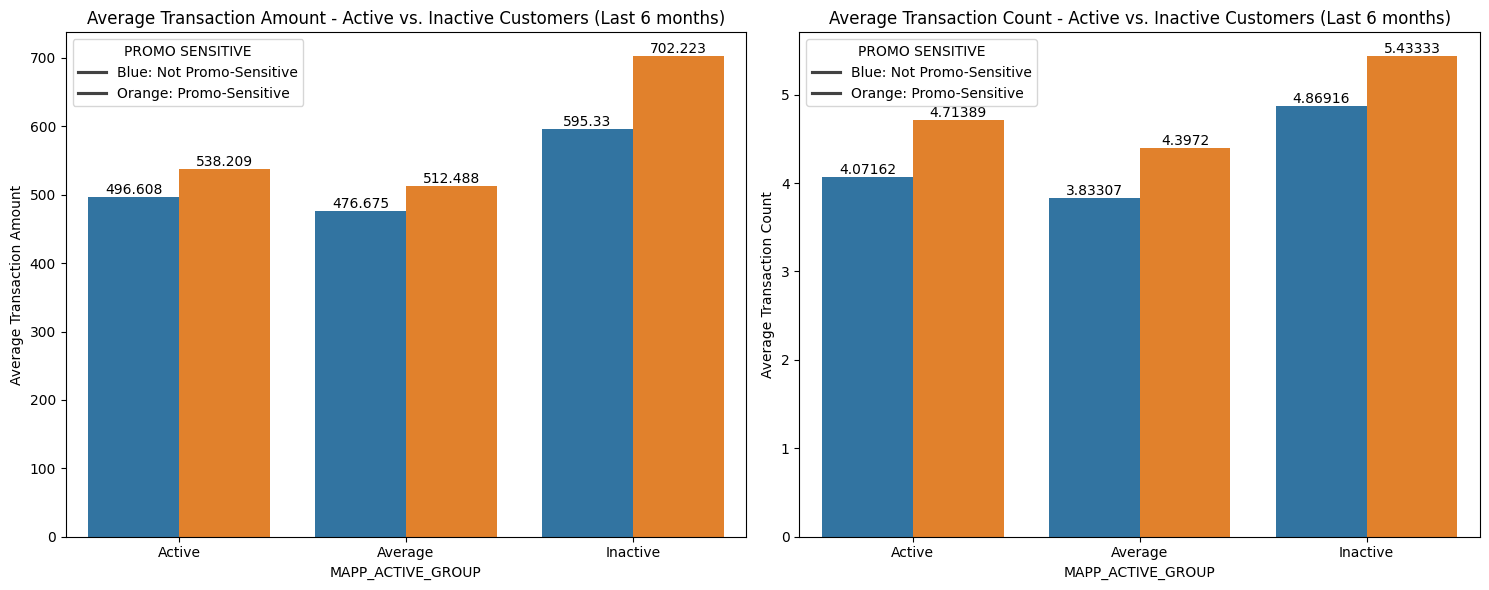

In [118]:
plt.figure(figsize=(15, 6))

# First subplot - Average Transaction Amount
ax = plt.subplot(1, 2, 1)
sns.barplot(x='MAPP_ACTIVE_GROUP', y='Average_Trans_Amount', hue='PROMO_SNSTV_L6M', data=df_behavior_l6m)
plt.title('Average Transaction Amount - Active vs. Inactive Customers (Last 6 months)')
plt.xlabel('MAPP_ACTIVE_GROUP')
plt.ylabel('Average Transaction Amount')
plt.legend(title='PROMO SENSITIVE', loc='upper left', labels=['Blue: Not Promo-Sensitive', 'Orange: Promo-Sensitive'])
# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

# Second subplot - Average Transaction Count
axs = plt.subplot(1, 2, 2)
sns.barplot(x='MAPP_ACTIVE_GROUP', y='Average_Trans_Count', hue='PROMO_SNSTV_L6M', data=df_behavior_l6m)
plt.title('Average Transaction Count - Active vs. Inactive Customers (Last 6 months)')
plt.xlabel('MAPP_ACTIVE_GROUP')
plt.ylabel('Average Transaction Count')
plt.legend(title='PROMO SENSITIVE', loc='upper left', labels=['Blue: Not Promo-Sensitive', 'Orange: Promo-Sensitive'])
# Add labels to histogram bars
for i in axs.containers:
    axs.bar_label(i)

plt.tight_layout()
plt.show()

In [119]:
# Difference in transaction behavior between active and inactive customers in the past 6 months
behavior_l6m = df3.groupby(['MAPP_ACTIVE_GROUP']).agg({
    'ACCOUNT_ID': 'nunique',
    'PROMO_SNSTV_L6M': 'sum',
    'TXN_AMT_L6M': 'mean',
    'TXN_CNT_L6M': 'mean'
})
behavior_l6m.columns = ['Total_Customers', 'Promo-Sensitive_Customers', 'Average_Transaction_Amount', 'Average_Transaction_Count']


behavior_l6m

,Total_Customers,Promo-Sensitive_Customers,Average_Transaction_Amount,Average_Transaction_Count
MAPP_ACTIVE_GROUP,,,,
Active,103251,67033.0,523.616174,4.488596
Average,7294,4718.0,499.840321,4.197971
Inactive,484,270.0,654.960331,5.183884


<ipython-input-120-63fd625e06af>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAPP_ACTIVE_GROUP', y='Total_Customers', data=behavior_l6m, ax=axes[0, 0], palette=colors)
<ipython-input-120-63fd625e06af>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAPP_ACTIVE_GROUP', y='Promo-Sensitive_Customers', data=behavior_l6m, ax=axes[0, 1], palette=colors)
<ipython-input-120-63fd625e06af>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAPP_ACTIVE_GROUP', y='Average_Transaction_Amount', data=behavior_l6m, ax=axes[1, 0], palette=col

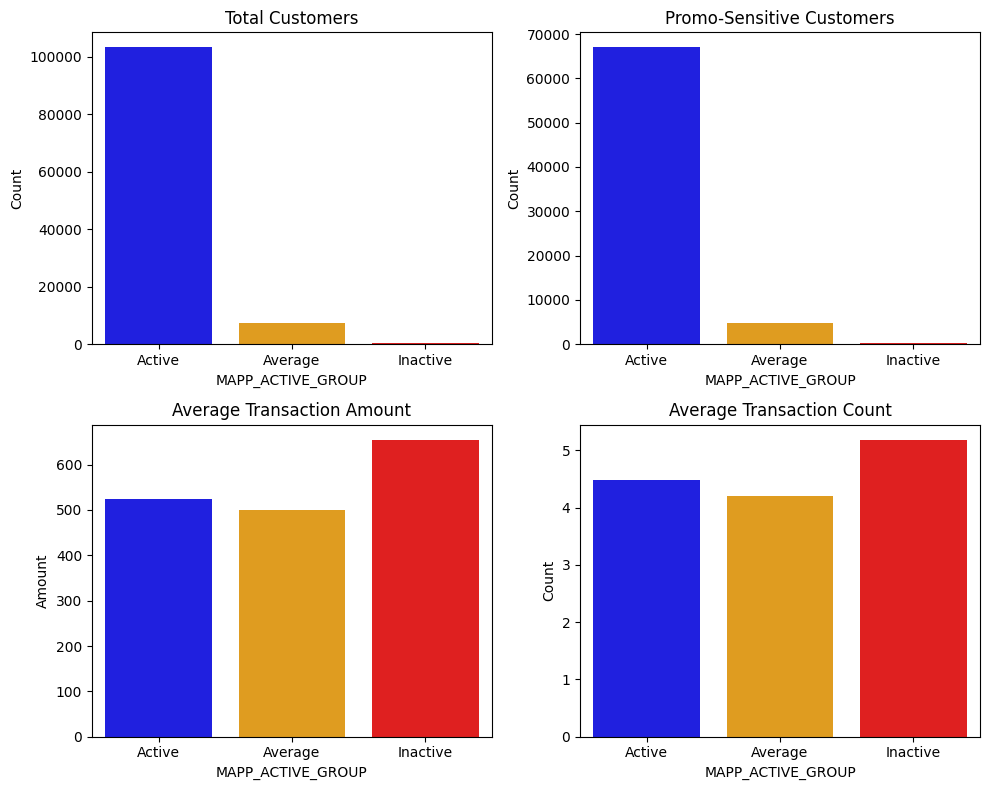

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan kombinasi warna
colors = ['blue', 'orange', 'red']

# Bar plots untuk membandingkan metrik
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1
sns.barplot(x='MAPP_ACTIVE_GROUP', y='Total_Customers', data=behavior_l6m, ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Total Customers')
axes[0, 0].set_xlabel('MAPP_ACTIVE_GROUP')
axes[0, 0].set_ylabel('Count')

# Plot 3
sns.barplot(x='MAPP_ACTIVE_GROUP', y='Promo-Sensitive_Customers', data=behavior_l6m, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Promo-Sensitive Customers')
axes[0, 1].set_xlabel('MAPP_ACTIVE_GROUP')
axes[0, 1].set_ylabel('Count')

# Plot ket3iga
sns.barplot(x='MAPP_ACTIVE_GROUP', y='Average_Transaction_Amount', data=behavior_l6m, ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Average Transaction Amount')
axes[1, 0].set_xlabel('MAPP_ACTIVE_GROUP')
axes[1, 0].set_ylabel('Amount')

# Plot 4
sns.barplot(x='MAPP_ACTIVE_GROUP', y='Average_Transaction_Count', data=behavior_l6m, ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Average Transaction Count')
axes[1, 1].set_xlabel('MAPP_ACTIVE_GROUP')
axes[1, 1].set_ylabel('Count')

# Layout
plt.tight_layout()

# Show the Plot
plt.show()


## 6.2.Question 2
Is there a relationship between increasing the number of email and SMS messages and improved sales performance? (Hint: Group the data by promo communication count and calculate the average sales per customer in each group)

In [121]:
#First, let's check the frequency of CNT_PROMO_L6M

df3['CNT_PROMO_L6M'].value_counts().sort_index()

CNT_PROMO_L6M
0.0        56
1.0       308
2.0      1224
3.0      3009
4.0     10586
5.0     26159
6.0     48790
7.0     14792
8.0      2324
9.0      1214
10.0      975
11.0     1122
12.0      343
13.0       56
14.0        9
15.0        4
16.0       26
17.0       14
18.0        5
19.0        5
20.0        5
21.0        3
Name: count, dtype: int64

In [122]:
# Grouping by promo channel matters
df3[['PROMO_CHANNEL','CNT_PROMO_L6M']].groupby ('PROMO_CHANNEL').value_counts().sort_index()

PROMO_CHANNEL  CNT_PROMO_L6M
0.0            0.0                 33
               1.0                206
               2.0                857
               3.0               2065
               4.0               7381
               5.0              18415
               6.0              34071
               7.0              10449
               8.0               1600
               9.0                833
               10.0               669
               11.0               777
               12.0               232
               13.0                40
               14.0                 3
               15.0                 2
               16.0                18
               17.0                11
               18.0                 5
               19.0                 4
               20.0                 4
               21.0                 2
1.0            0.0                 23
               1.0                102
               2.0                367
               3.0   

It seems like the majority have received 4-7 SMS/Emails in the last 6 months; about once a month

In [123]:
# It seems like the more SMS/Email sent, the more sales per customer
df3.groupby(['CNT_PROMO_L6M']).agg({
     'ACCOUNT_ID' : ['count'],
     'TOTAL_SALES_L6M' : ['mean'],
     'TOTAL_SALES_PROMO_L6M' : ['mean']
})

,ACCOUNT_ID,TOTAL_SALES_L6M,TOTAL_SALES_PROMO_L6M
,count,mean,mean
CNT_PROMO_L6M,,,
0.0,56,271.858929,133.925000
1.0,308,380.546429,239.758442
2.0,1224,318.521569,211.007843
3.0,3009,319.766966,190.804786
4.0,10586,362.423994,219.158615
5.0,26159,422.579804,256.566830
6.0,48790,566.444806,341.516764
7.0,14792,665.421620,412.142780


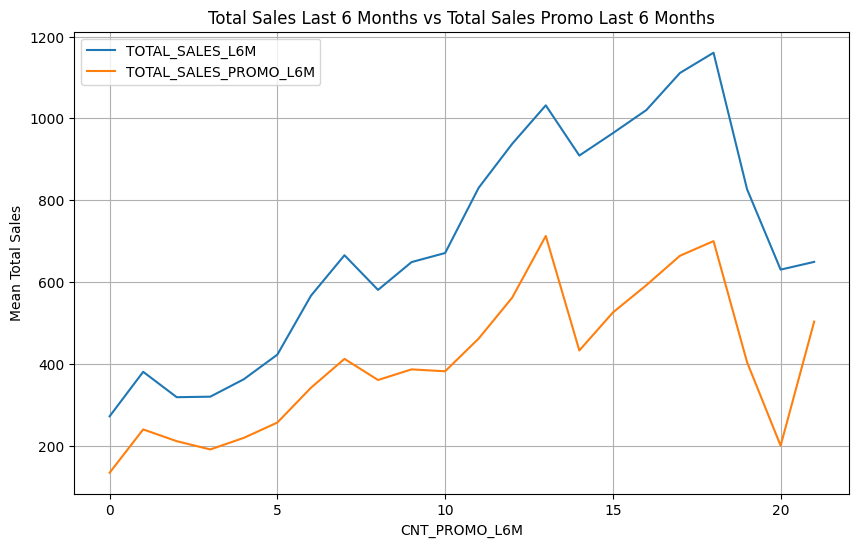

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'CNT_PROMO_L6M': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0],
    'TOTAL_SALES_L6M': [271.858929, 380.546429, 318.521569, 319.766966, 362.423994, 422.579804, 566.444806, 665.421620, 580.760155, 648.721170, 670.885026, 830.336096, 937.854227, 1031.791071, 909.088889, 963.825000, 1020.403846, 1110.971429, 1160.400000, 826.640000, 630.300000, 649.200000],
    'TOTAL_SALES_PROMO_L6M': [133.925000, 239.758442, 211.007843, 190.804786, 219.158615, 256.566830, 341.516764, 412.142780, 360.555981, 386.493657, 381.855692, 461.836542, 561.958017, 712.530357, 432.711111, 525.450000, 592.442308, 664.192857, 700.000000, 404.000000, 200.000000, 503.333333]
}

df = pd.DataFrame(data)

# Create chart
plt.figure(figsize=(10, 6))
plt.plot(df['CNT_PROMO_L6M'], df['TOTAL_SALES_L6M'], label='TOTAL_SALES_L6M')
plt.plot(df['CNT_PROMO_L6M'], df['TOTAL_SALES_PROMO_L6M'], label='TOTAL_SALES_PROMO_L6M')
plt.xlabel('CNT_PROMO_L6M')
plt.ylabel('Mean Total Sales')
plt.title('Total Sales Last 6 Months vs Total Sales Promo Last 6 Months')
plt.legend()
plt.grid(True)
plt.show()


#**MILESTONE 2**


#**1. RFM Segmentation**

**RFM (Recency, Frequency, Monetary) Segmentation** is used because it provides a strong understanding of customer behavior and allows businesses to group customers into different segments based on three main factors, namely Recency, Frequency and Monetary.
RFM provides a clear understanding of customers' spending habits and interactions with the business. The resulting RFM segments are easy to understand and can be used to develop appropriate marketing strategies. With this segmentation, we can determine personalized marketing and retention strategies that can increase relevance and effectiveness.

The Card Partnership Team want to know a customer segmentation to better understand spending patterns among RevoBank customers and identify business opportunities to customize the rewards program for each customer segment. Secondary goal to identify opportunities to reduce the cost of promotion.

## **1.1.Check Outlier**

In [63]:
# Make a copy of the clean data for segmentation
df_segmentation = df3.copy()

In [64]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111029 entries, 0 to 112632
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             111029 non-null  int64         
 1   MCC                    111029 non-null  object        
 2   MERCHANT_NAME          111029 non-null  object        
 3   AVG_TXN_AMT_L6M        111029 non-null  float64       
 4   AVG_TXN_AMT_LTM        111029 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  111029 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  111029 non-null  float64       
 7   TXN_CNT_L6M            111029 non-null  float64       
 8   TXN_CNT_LTM            111029 non-null  float64       
 9   PROMO_TXN_CNT_L6M      111029 non-null  float64       
 10  PROMO_TXN_CNT_LTM      111029 non-null  float64       
 11  LAST_TXN_DAY           111029 non-null  float64       
 12  CNT_PROMO_L6M          111029 non-null  float64  

In [65]:
df_segmentation = df_segmentation[['TXN_CNT_LTM', 'PROXY_INCOME', 'AVG_TXN_AMT_LTM', 'MOB', 'CUSTOMER_AGE']]
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111029 entries, 0 to 112632
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TXN_CNT_LTM      111029 non-null  float64
 1   PROXY_INCOME     111029 non-null  float64
 2   AVG_TXN_AMT_LTM  111029 non-null  float64
 3   MOB              111029 non-null  float64
 4   CUSTOMER_AGE     111029 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 5.1 MB


In [66]:
df_segmentation.head()

,TXN_CNT_LTM,PROXY_INCOME,AVG_TXN_AMT_LTM,MOB,CUSTOMER_AGE
0,21.0,59785.0,201.0,123.0,47
1,22.0,32597.0,114.1,109.0,31
2,12.0,0.0,242.7,89.0,53
3,27.0,0.0,210.0,86.0,39
4,44.0,42253.0,77.5,124.0,33


In [67]:
df_segmentation2 = df_segmentation.copy()
df_segmentation2

,TXN_CNT_LTM,PROXY_INCOME,AVG_TXN_AMT_LTM,MOB,CUSTOMER_AGE
0,21.0,59785.0,201.0,123.0,47
1,22.0,32597.0,114.1,109.0,31
2,12.0,0.0,242.7,89.0,53
3,27.0,0.0,210.0,86.0,39
4,44.0,42253.0,77.5,124.0,33
...,...,...,...,...,...
112628,12.0,0.0,84.2,124.0,44
112629,22.0,35533.0,113.4,68.0,30
112630,28.0,0.0,36.8,125.0,43
112631,23.0,41249.0,147.3,116.0,36


## **1.2.RFM Variables**

To do RFM segmentation, we need to identify which variables are R, F, and M

- **R**ecency: `transaction_date`
- **F**requency: `order_id`
- **M**onetary: `revenue`

Index(['TXN_CNT_LTM', 'PROXY_INCOME', 'AVG_TXN_AMT_LTM', 'MOB',
       'CUSTOMER_AGE'],
      dtype='object')


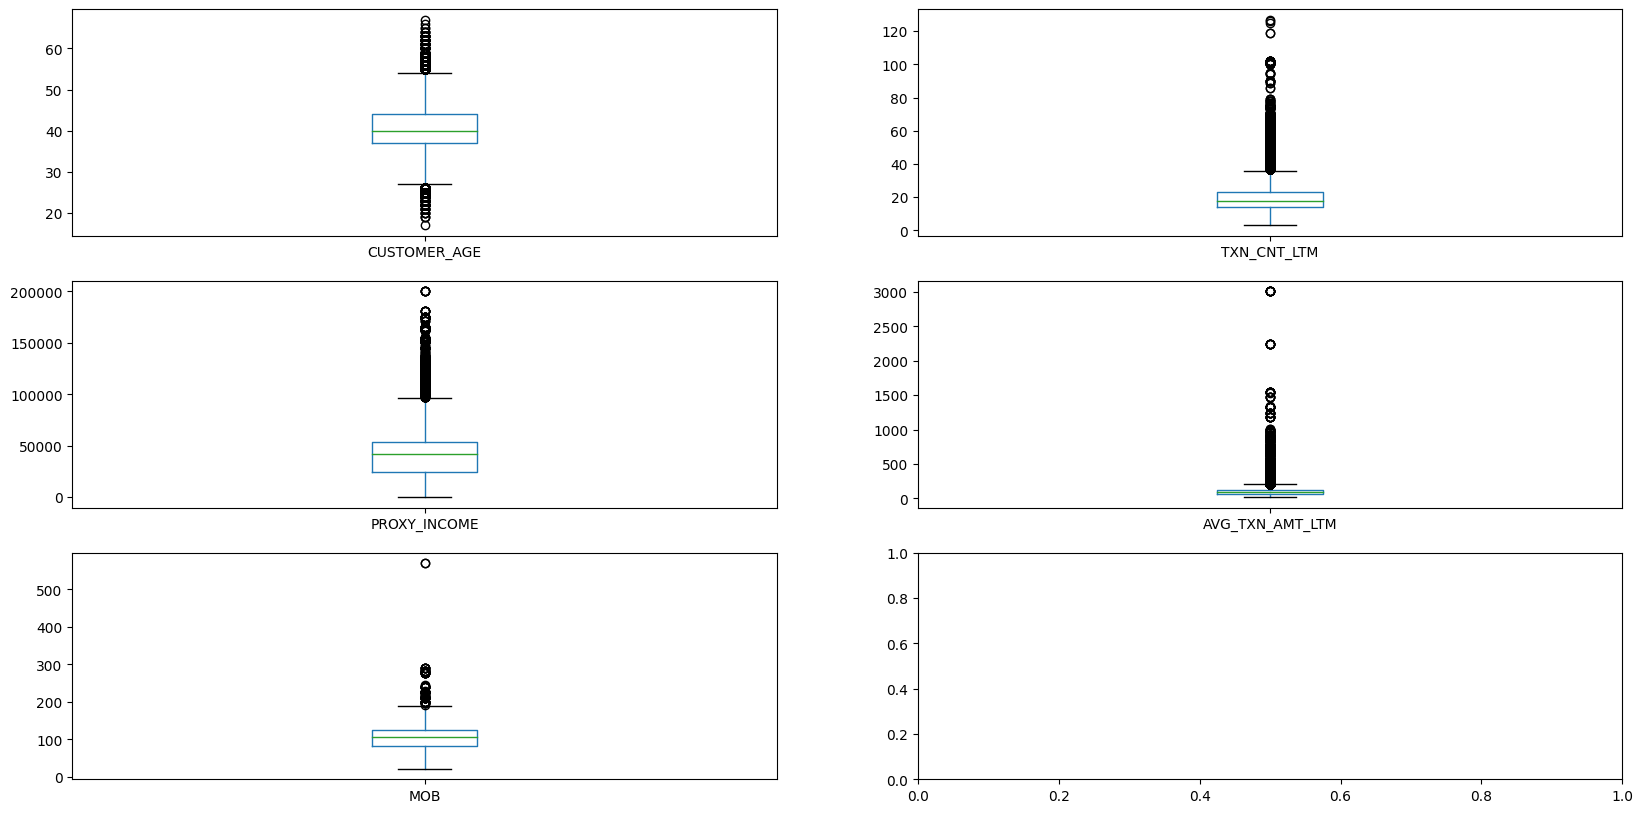

In [68]:
# Verify column names in the DataFrame
print(df_segmentation2.columns)

# Ensure that the column names in the feature list match the DataFrame columns
feature = ['CUSTOMER_AGE', 'TXN_CNT_LTM', 'PROXY_INCOME', 'AVG_TXN_AMT_LTM', 'MOB']

# Adjust chart position and chart size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# Iterate over each feature and create boxplots
for i, el in enumerate(feature):
    # Check if the feature exists in the DataFrame columns
    if el in df_segmentation2.columns:
        a = df_segmentation2.boxplot(column=el, ax=axes.flatten()[i], grid=False)
    else:
        print(f"Column '{el}' not found in the DataFrame.")

plt.show()

In [69]:
df_segmentation2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111029 entries, 0 to 112632
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TXN_CNT_LTM      111029 non-null  float64
 1   PROXY_INCOME     111029 non-null  float64
 2   AVG_TXN_AMT_LTM  111029 non-null  float64
 3   MOB              111029 non-null  float64
 4   CUSTOMER_AGE     111029 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 5.1 MB


In [70]:
df_cleaned = df_segmentation2.copy()

# Define the conditions for outliers
outlier_conditions = (
    (df_cleaned['CUSTOMER_AGE'] > 55) |
    (df_cleaned['CUSTOMER_AGE'] < 30) |
    (df_cleaned['TXN_CNT_LTM'] > 40) |
    (df_cleaned['PROXY_INCOME'] > 98000) |
    (df_cleaned['AVG_TXN_AMT_LTM'] > 400) |
    (df_cleaned['MOB'] > 200)
)

# Filter the DataFrame to remove rows with outliers in specified columns
df_cleaned = df_cleaned[~outlier_conditions]

print(df_cleaned)

        TXN_CNT_LTM  PROXY_INCOME  AVG_TXN_AMT_LTM    MOB  CUSTOMER_AGE
0              21.0       59785.0            201.0  123.0            47
1              22.0       32597.0            114.1  109.0            31
2              12.0           0.0            242.7   89.0            53
3              27.0           0.0            210.0   86.0            39
5              22.0       56465.0            101.3   78.0            35
...             ...           ...              ...    ...           ...
112628         12.0           0.0             84.2  124.0            44
112629         22.0       35533.0            113.4   68.0            30
112630         28.0           0.0             36.8  125.0            43
112631         23.0       41249.0            147.3  116.0            36
112632         25.0           0.0             64.4  112.0            41

[101676 rows x 5 columns]


In [71]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101676 entries, 0 to 112632
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TXN_CNT_LTM      101676 non-null  float64
 1   PROXY_INCOME     101676 non-null  float64
 2   AVG_TXN_AMT_LTM  101676 non-null  float64
 3   MOB              101676 non-null  float64
 4   CUSTOMER_AGE     101676 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 MB


In [72]:
df_cleaned.describe()

,TXN_CNT_LTM,PROXY_INCOME,AVG_TXN_AMT_LTM,MOB,CUSTOMER_AGE
count,101676.000000,101676.00000,101676.000000,101676.000000,101676.000000
mean,18.968223,37311.90396,104.006733,100.519464,40.724547
std,6.736082,24492.81260,51.839303,25.190286,5.246714
min,3.000000,0.00000,17.300000,21.000000,30.000000
25%,14.000000,24473.75000,70.000000,80.000000,37.000000
50%,17.000000,41752.00000,93.000000,105.000000,41.000000
75%,23.000000,53090.00000,123.300000,124.000000,44.000000
max,40.000000,97843.00000,397.000000,189.000000,55.000000


## **1.3.RFM Table**

In [73]:
# Create dataframe RFM Segmentation
df_rfm = df3[['ACCOUNT_ID','LAST_TXN_DAY','PROMO_TXN_CNT_L6M','AVG_PROMO_TXN_AMT_L6M']].copy()
df_rfm = df_rfm.set_index(['ACCOUNT_ID'])

# RFM columns
df_rfm.columns = ['recency','frequency','monetary']

df_rfm

,recency,frequency,monetary
ACCOUNT_ID,,,
100000004,15.0,2.0,200.0
100000008,20.0,2.0,140.0
100000012,16.0,2.0,400.0
100000014,20.0,6.0,242.9
100000015,25.0,4.0,97.5
...,...,...,...
101059832,4.0,2.0,100.0
101059843,8.0,1.0,120.0
101059857,19.0,3.0,46.7


## **1.4.RFM Segments**

RFM works by dividing each RFM variables into categories of equal size ("bins").
To do so, we can use `pd.qcut(df, q=..., labels =...)`

After that, we create a combined score of RFM and interpret each score accordingly.

Let's start with 5 bins of each categories.

In [74]:
# Recency
pd.qcut(df_rfm['recency'], q = 5)

ACCOUNT_ID
100000004    (1.999, 16.0]
100000008     (19.0, 21.0]
100000012    (1.999, 16.0]
100000014     (19.0, 21.0]
100000015     (21.0, 28.0]
                 ...      
101059832    (1.999, 16.0]
101059843    (1.999, 16.0]
101059857     (18.0, 19.0]
101059860    (1.999, 16.0]
101059866    (1.999, 16.0]
Name: recency, Length: 111029, dtype: category
Categories (5, interval[float64, right]): [(1.999, 16.0] < (16.0, 18.0] < (18.0, 19.0] <
                                           (19.0, 21.0] < (21.0, 28.0]]

In [75]:
pd.qcut(df_rfm['recency'], q = 5).value_counts()

recency
(16.0, 18.0]     33165
(1.999, 16.0]    29175
(21.0, 28.0]     21997
(19.0, 21.0]     14721
(18.0, 19.0]     11971
Name: count, dtype: int64

In [76]:
df_rfm['frequency'].value_counts().sort_index()

frequency
1.0     30630
2.0     28637
3.0     20920
4.0     13433
5.0      8014
6.0      4968
7.0      2862
8.0      1151
9.0       361
10.0       53
Name: count, dtype: int64

In [77]:
# Frequenzy
pd.qcut(df_rfm['frequency'], q = 5, duplicates='drop', labels= [2,3,4,5]).value_counts()

frequency
2    59267
3    20920
5    17409
4    13433
Name: count, dtype: int64

In [78]:
# Monetary
pd.qcut(df_rfm['monetary'], q = 5, duplicates='drop', labels= [1,2,3,4,5]).value_counts()

monetary
2    33333
1    22714
5    22202
4    22091
3    10689
Name: count, dtype: int64

In [79]:
df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q = 5, labels = ['5','4','3','2','1'])
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q = 5, duplicates = 'drop', labels = ['2','3','4','5'])
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q = 5, labels = ['1','2','3','4','5'])
df_rfm['rfm_score'] = df_rfm['r_score'].astype(str) + df_rfm['f_score'].astype(str) + df_rfm['m_score'].astype(str)

In [80]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111029 entries, 100000004 to 101059866
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   recency    111029 non-null  float64 
 1   frequency  111029 non-null  float64 
 2   monetary   111029 non-null  float64 
 3   r_score    111029 non-null  category
 4   f_score    111029 non-null  category
 5   m_score    111029 non-null  category
 6   rfm_score  111029 non-null  object  
dtypes: category(3), float64(3), object(1)
memory usage: 4.6+ MB


## 1.5.RFM Segment Interpretation

Seems like the biggest group is the 555 score, which is the worst in all variables.

However, we typically do not interpret the RFM score by the score only. We typically map with a predefined segments (example: https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit?usp=sharing)

In [81]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_segments = pd.read_csv(GSHEET_URL_CSV)

rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)
rfm_segments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rfm_score   125 non-null    object
 1   segment     125 non-null    object
 2   Activity    125 non-null    object
 3   Actionable  125 non-null    object
dtypes: object(4)
memory usage: 4.0+ KB


In [82]:
rfm_segments

,rfm_score,segment,Activity,Actionable
0,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
1,554,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,544,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,454,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
...,...,...,...,...
120,112,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
121,121,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
122,131,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
123,141,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."


In [83]:
# Let's merge the score and the segment definition
df_rfm2 = rfm_segments.merge(df_rfm, how='left', left_on ='rfm_score', right_on = 'rfm_score')
df_rfm2

,rfm_score,segment,Activity,Actionable,recency,frequency,monetary,r_score,f_score,m_score
0,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...,15.0,8.0,226.3,5,5,5
1,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...,16.0,6.0,210.0,5,5,5
2,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...,14.0,5.0,260.0,5,5,5
3,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...,8.0,5.0,162.5,5,5,5
4,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...,11.0,5.0,287.5,5,5,5
...,...,...,...,...,...,...,...,...,...,...
111049,151,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor...",22.0,6.0,40.0,1,5,1
111050,151,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor...",24.0,5.0,27.5,1,5,1
111051,151,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor...",23.0,6.0,46.7,1,5,1
111052,151,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor...",22.0,7.0,30.0,1,5,1


In [84]:
# Let's check the biggest segment group
df_rfm2['segment'].value_counts()

segment
Promising                      24539
Potential Loyalist             22283
At Risk                        19354
Hibernating                    14968
Recent Customers                8318
Customers Needing Attention     6989
Loyal Customers                 3804
Champions                       3796
About To Sleep                  2970
Lost                            2600
Can’t Lose Them                 1433
Name: count, dtype: int64

<ipython-input-85-8b5f749949c8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_values.index, y=percentage_values.values, palette='viridis')


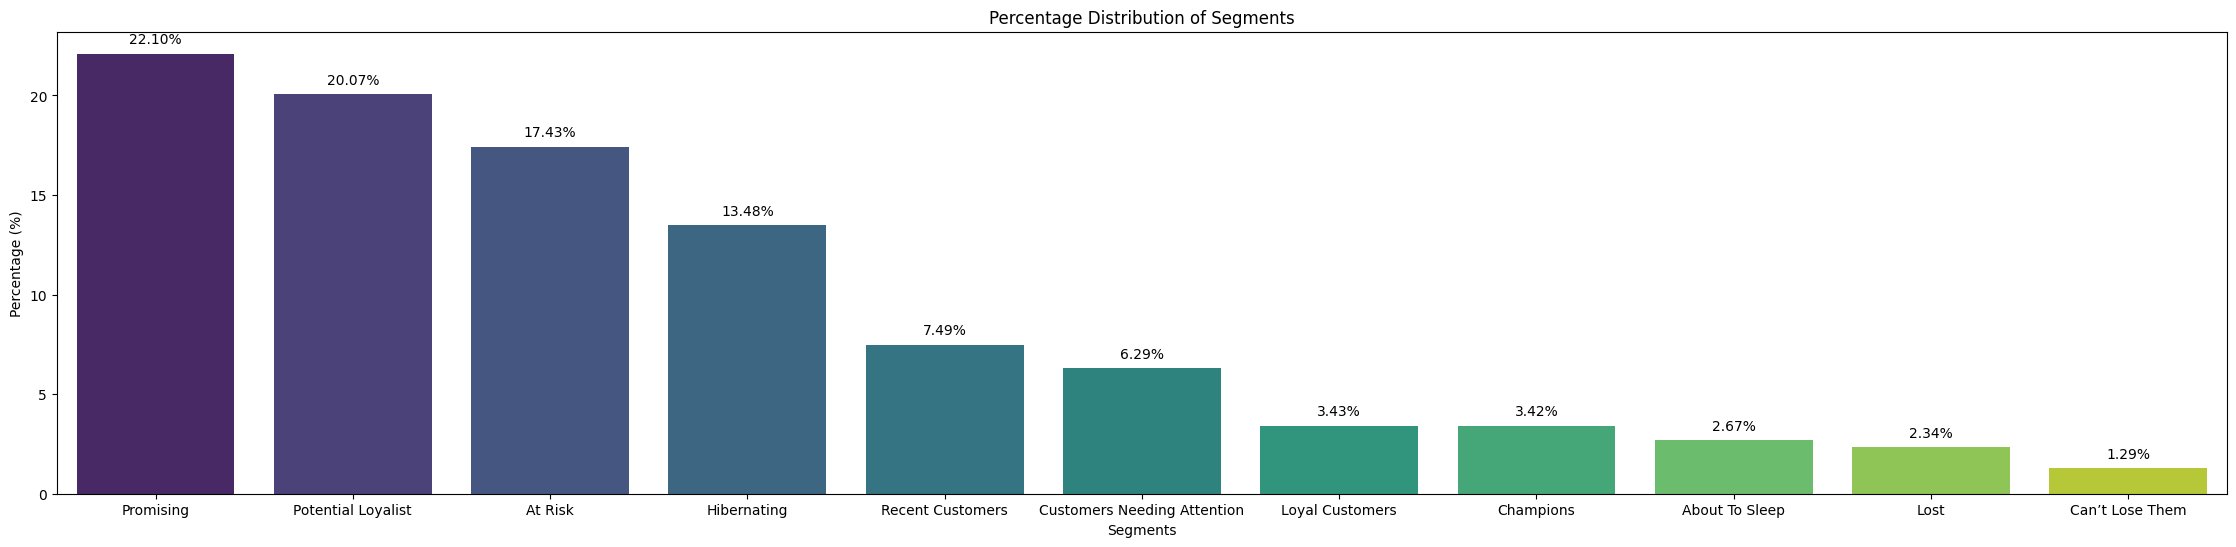

In [85]:
# Calculate percentage values
percentage_values = df_rfm2['segment'].value_counts(normalize=True) * 100

# Create bar plots
plt.figure(figsize=(28, 6))
sns.barplot(x=percentage_values.index, y=percentage_values.values, palette='viridis')
plt.title('Percentage Distribution of Segments')
plt.xlabel('Segments')
plt.ylabel('Percentage (%)')

for i, value in enumerate(percentage_values.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center')

plt.show()

In [86]:
# Let's check the biggest segment group
df_rfm2['Actionable'].value_counts()

Actionable
Create brand awareness, offer free trials                                                            24539
Offer membership / loyalty program, recommend other products.                                        22283
Send personalized emails to reconnect, offer renewals, provide helpful resources.                    19354
Offer other relevant products and special discounts. Recreate brand value.                           14968
Provide on-boarding support, give them early success, start building relationship.                    8318
Make limited time offers, Recommend based on past purchases. Reactivate them.                         6989
Upsell higher value products. Ask for reviews. Engage them.                                           3804
Reward them. Can be early adopters for new products. Will promote your brand.                         3796
Share valuable resources, recommend popular products / renewals at discount, reconnect with them.     2970
Revive interest with reach

In [87]:
# Merge df_rfm with promo sensitivity information
df_combined = pd.merge(df_rfm, df3[['ACCOUNT_ID', 'PROMO_SNSTV_L6M']], on='ACCOUNT_ID', how='left')

# Average Sales per Client
avg_monetary_per_segment = df_combined.groupby('rfm_score')['monetary'].mean()

# Average Transaction Frequency per Client
avg_frequency_per_segment = df_combined.groupby('rfm_score')['frequency'].mean()

# Revenue Generated
total_revenue_per_segment = df_combined.groupby('rfm_score')['monetary'].sum()

# Larger Proportion of Promo-Sensitive Clients
promo_sensitive_percentage_per_segment = df_combined.groupby('rfm_score')['PROMO_SNSTV_L6M'].mean() * 100

# Combine the results into a summary DataFrame
summary_df = pd.DataFrame({
    'Average_Sales_Per_Client': avg_monetary_per_segment,
    'Average_Frequency_Per_Client': avg_frequency_per_segment,
    'Total_Revenue_Per_Client': total_revenue_per_segment,
    'Promo_Sensitive_Percentage': promo_sensitive_percentage_per_segment
}).reset_index()

# Display the summary DataFrame
summary_df

,rfm_score,Average_Sales_Per_Client,Average_Frequency_Per_Client,Total_Revenue_Per_Client,Promo_Sensitive_Percentage
0,121,15.313729,1.181818,16508.2,3.803340
1,122,95.752196,1.502272,379370.2,42.554266
2,123,110.042216,1.645709,110262.3,62.574850
3,124,137.350192,1.579923,392684.2,62.994054
4,125,241.181843,1.543013,709315.8,63.141789
...,...,...,...,...,...
95,551,48.145370,6.104745,83195.2,95.081019
96,552,85.330363,5.947150,82343.8,92.331606
97,553,109.517412,5.781176,46544.9,99.058824
98,554,134.054054,5.849421,69440.0,96.138996


Highest score is 555 and lowest is 121

In [88]:
# Higher Average Sales
max_avg_sales_row_index = summary_df['Average_Sales_Per_Client'].idxmax()

# Get the 'rfm_score' value of the row with the highest score
max_avg_sales_rfm_score = summary_df.loc[max_avg_sales_row_index, 'rfm_score']

print(f"rfm_score with the highest Average_Sales_Per_Client is {max_avg_sales_rfm_score}")

rfm_score with the highest Average_Sales_Per_Client is 525


In [89]:
# Higher Average Transaction Frequency
max_avg_frequency_row_index = summary_df['Average_Frequency_Per_Client'].idxmax()

# Get the 'rfm_score' value of the row with the highest score
max_avg_frequency_rfm_score = summary_df.loc[max_avg_frequency_row_index, 'rfm_score']

print(f"rfm_score with the highest Average_Frequency_Per_Client is {max_avg_frequency_rfm_score}")

rfm_score with the highest Average_Frequency_Per_Client is 451


In [90]:
# Higher Revenue Generated
max_total_revenue_row_index = summary_df['Total_Revenue_Per_Client'].idxmax()

# Get the 'rfm_score' value of the row with the highest score
max_total_revenue_rfm_score = summary_df.loc[max_total_revenue_row_index, 'rfm_score']

print(f"rfm_score with the highest Total_Revenue_Per_Client is {max_total_revenue_rfm_score}")

rfm_score with the highest Total_Revenue_Per_Client is 425


In [91]:
# Find the index of the row with the maximum 'Promo_Sensitive_Percentage'
max_promo_sensitive_index = summary_df['Promo_Sensitive_Percentage'].idxmax()

# Get the 'rfm_score' with the maximum 'Promo_Sensitive_Percentage'
max_promo_sensitive_rfm_score = summary_df.loc[max_promo_sensitive_index, 'rfm_score']

# Display the result
print(f"rfm_score with the largest Promo_Sensitive_Percentage is {max_promo_sensitive_rfm_score}")

rfm_score with the largest Promo_Sensitive_Percentage is 153


#**2. Gender Segmentation**

In [92]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111029 entries, 0 to 112632
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             111029 non-null  int64         
 1   MCC                    111029 non-null  object        
 2   MERCHANT_NAME          111029 non-null  object        
 3   AVG_TXN_AMT_L6M        111029 non-null  float64       
 4   AVG_TXN_AMT_LTM        111029 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  111029 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  111029 non-null  float64       
 7   TXN_CNT_L6M            111029 non-null  float64       
 8   TXN_CNT_LTM            111029 non-null  float64       
 9   PROMO_TXN_CNT_L6M      111029 non-null  float64       
 10  PROMO_TXN_CNT_LTM      111029 non-null  float64       
 11  LAST_TXN_DAY           111029 non-null  float64       
 12  CNT_PROMO_L6M          111029 non-null  float64  

In [93]:
df_gender = df3.copy()

# '1' if account holder is female and '0' is male
gender_mapping = {1: 'Female', 0: 'Male'}
df_gender['FLAG_FEMALE'] = df_gender['FLAG_FEMALE'].replace(gender_mapping)

print(df_gender)

        ACCOUNT_ID                MCC MERCHANT_NAME  AVG_TXN_AMT_L6M  \
0        100000004  5262-MARKETPLACES      REVOSHOP            216.0   
1        100000008  5262-MARKETPLACES      REVOSHOP            143.3   
2        100000012  5262-MARKETPLACES      REVOSHOP            263.3   
3        100000014  5262-MARKETPLACES      REVOSHOP            235.6   
4        100000015  5262-MARKETPLACES      REVOSHOP             98.0   
...            ...                ...           ...              ...   
112628   101059832  5262-MARKETPLACES      REVOSHOP            100.0   
112629   101059843  5262-MARKETPLACES      REVOSHOP            120.0   
112630   101059857  5262-MARKETPLACES      REVOSHOP             52.9   
112631   101059860  5262-MARKETPLACES      REVOSHOP            195.0   
112632   101059866  5262-MARKETPLACES      REVOSHOP             84.0   

        AVG_TXN_AMT_LTM  AVG_PROMO_TXN_AMT_L6M  AVG_PROMO_TXN_AMT_LTM  \
0                 201.0                  200.0                

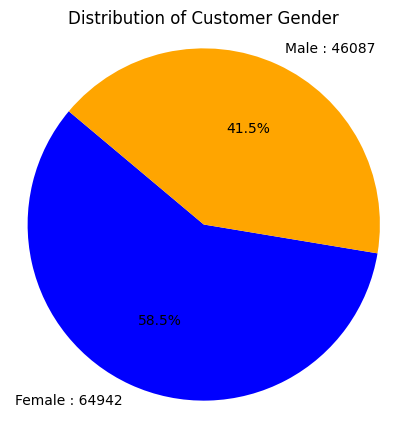

In [94]:
# Calculate Female dan Male
female_count = (df_gender['FLAG_FEMALE'] == 'Female').sum()
male_count = (df_gender['FLAG_FEMALE'] == 'Male').sum()

# Data for pie chart
sizes = [female_count, male_count]
labels = ['Female : 64942', 'Male : 46087']
colors = ['blue', 'orange']

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Customer Gender')
plt.show()


In [95]:
# Show the number of female and male customers
gender_counts = df_gender['FLAG_FEMALE'].value_counts()

print("Male :", gender_counts['Male'])
print("Female :", gender_counts['Female'])

Male : 46087
Female : 64942


#**3. Age Segmentation**

In [96]:
df_age = df3.copy()

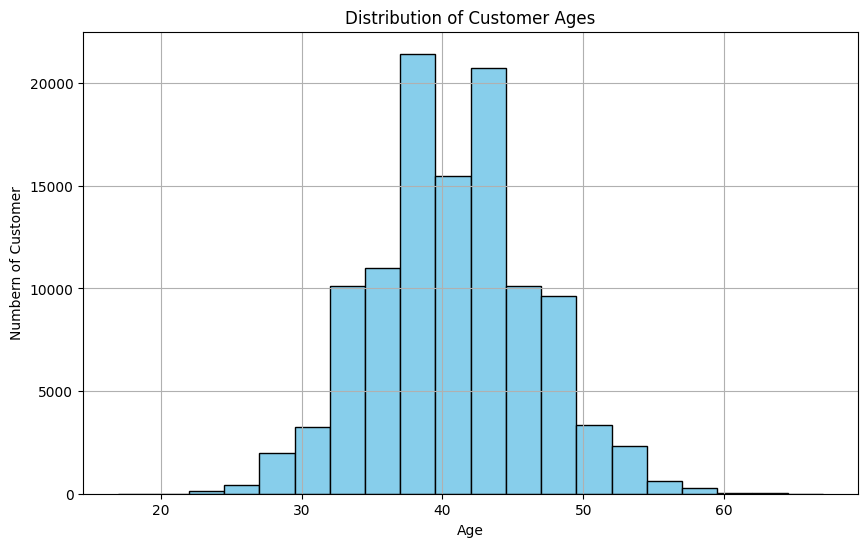

In [97]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_age['CUSTOMER_AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Numbern of Customer')
plt.grid(True)
plt.show()


In [98]:
# Show min & max customer age
age_min = df_age['CUSTOMER_AGE'].min()
age_max = df_age['CUSTOMER_AGE'].max()

print("Max Age :", age_min)
print("Min Age :", age_max)

Max Age : 17
Min Age : 67
